# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [0]:
!pip install scipy==1.2 --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy

### Importe o dataset

In [7]:
dados = pd.read_csv("dados_projeto.csv",sep=";" )

### Visualize o conteúdo do DataFrame

In [9]:
dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [ ]:
# Y = Consumo
# X = temperatura

### Obtenha e avalie as estatísticas descritivas dos dados

In [14]:
dados.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

<AxesSubplot:>

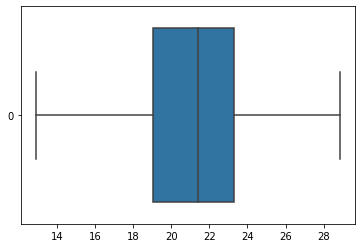

In [48]:
import seaborn as sns

sns.boxplot(data= dados['X'],orient='h')

<AxesSubplot:>

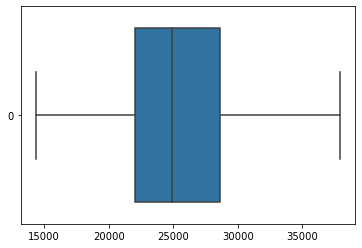

In [49]:
sns.boxplot(data= dados['Y'],orient='h')

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

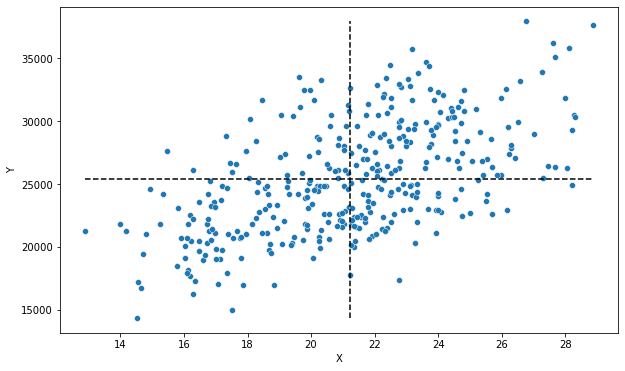

In [51]:
x = dados['X']
y = dados['Y']

ax = sns.scatterplot(x=x,y=y)
ax.figure.set_size_inches(10,6)
ax.hlines(y = y.mean(), xmin=x.min(), xmax=x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin=y.min(), ymax=y.max(), colors='black', linestyles='dashed')

### <font color='red'>Utilizando a matriz de correlação</font>

In [24]:
dados[["X", "Y"]].corr()

,X,Y
X,1.000000,0.574615
Y,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim, existe uma relação entre as variaveis

É possível quantificar a intensidade dessa relação?

Resp.:Sim, a intensidade da relação é de 0.57

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.:N é possivel

### Prepare os dados para estimar um modelo de regressão linear simples

In [30]:
y = dados['Y']
x = sm.add_constant(dados['X'])

### Estime o modelo de regressão linear simples

In [41]:
resultado = sm.OLS(y, x, missing ='drop').fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           1.87e-33
Time:                        16:51:41   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.000    6020.880     1.1e+04
X            794.8825     59.423     13.377      0.000     678.027     911.738
==============================================================================
Omnibus:                       11.300   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                9.673
Skew:                           0.324   Prob(JB):                      0.00793
Kurtosis:                       2.534   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Visualize o resultado da regressão

In [33]:
resultado.params

const    8528.907284
X         794.882537
dtype: float64

### Obtenha o $Y$ previsto

In [34]:
dados['Y_Previsto'] = resultado.predict()
dados.head()

,Y,X,Y_Previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


In [35]:
dados.describe()

,Y,X,Y_Previsto
count,365.000000,365.000000,365.000000
mean,25401.367123,21.226356,25401.367123
std,4399.142703,3.180108,2527.812049
min,14343.000000,12.900000,18782.892011
25%,22008.000000,19.020000,23647.573138
50%,24867.000000,21.380000,25523.495925
75%,28631.000000,23.280000,27033.772745
max,37937.000000,28.860000,31469.217302


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [37]:
resultado.predict([1,42])[0]

41913.973838166276

### Obtenha os resíduos da regressão

In [40]:
dados['Residuos'] = resultado.resid
dados

,Y,X,Y_Previsto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685
...,...,...,...,...
360,32307,24.00,27606.088172,4700.911828
361,26095,22.64,26525.047922,-430.047922
362,22309,21.68,25761.960686,-3452.960686
363,20467,21.38,25523.495925,-5056.495925


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

<AxesSubplot:xlabel='Y_Previsto', ylabel='Residuos'>

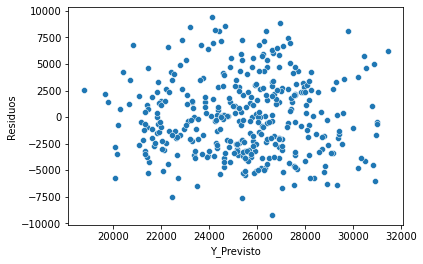

In [42]:
sns.scatterplot(x = dados['Y_Previsto'], y = dados['Residuos'])

### Obtenha o QQPlot dos resíduos

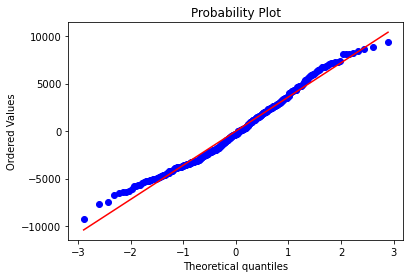

In [53]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

(_,(_,_,_)) = probplot(dados['Residuos'], plot =plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [54]:
resultado.rsquared

0.33018204933243234